**8.	Is there a difference in the number of double faults based on gender?**

Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Reading requierd tables and dropping duplicated data

In [2]:
MatchHomeTeamInfo = pd.read_csv( 'C:/Users/Maedeh/Desktop/TenisMatchPro/data/external/MatchHomeTeamInfo.csv')
MatchAwayTeamInfo = pd.read_csv( 'C:/Users/Maedeh/Desktop/TenisMatchPro/data/external/MatchAwayTeamInfo.csv')
PeriodInfo = pd.read_csv( 'C:/Users/Maedeh/Desktop/TenisMatchPro/data/external/PeriodInfo.csv')
MatchHomeTeamInfo_dd = MatchHomeTeamInfo.drop_duplicates (subset = 'match_id')
MatchAwayTeamInfo_dd = MatchAwayTeamInfo.drop_duplicates (subset = 'match_id')


Filter rows where the statistic_name is "double_faults" and Merge with MatchHomeTeamInfo and MatchAwayTeamInfo to get gender and double faults

In [12]:
# Filter rows where the statistic_name is "double_faults" and ALL period
double_faults_data = PeriodInfo[(PeriodInfo['statistic_name'] == 'double_faults') &
                                (PeriodInfo['period'] == 'ALL')]

# Merge with MatchHomeTeamInfo to get home team gender and double faults
home_merged = pd.merge(double_faults_data,
                       MatchHomeTeamInfo_dd[['match_id', 'gender', 'player_id']], on='match_id').drop_duplicates(subset='match_id')
home_double_faults = home_merged[['gender',
                                  'home_stat' , 'player_id']].rename(columns={'home_stat': 'double_faults'})

# Merge with MatchAwayTeamInfo to get away team gender and double faults
away_merged = pd.merge(double_faults_data,
                       MatchAwayTeamInfo_dd[['match_id', 'gender' , 'player_id']], on='match_id').drop_duplicates(subset='match_id')
away_double_faults = away_merged[['gender', 
                                  'away_stat' , 'player_id']].rename(columns={'away_stat': 'double_faults'})

# Combine home and away double faults
combined_double_faults = pd.concat([home_double_faults, away_double_faults])

# Convert double_faults to numeric
combined_double_faults['double_faults'] = pd.to_numeric(combined_double_faults['double_faults'])
male_combined_double_faults = combined_double_faults[combined_double_faults['gender'] == 'M']
female_combined_double_faults = combined_double_faults[combined_double_faults['gender'] == 'F']
male_combined_double_faults.head()


,gender,double_faults,player_id
0,M,2,14486
1,M,3,206570
2,M,4,46391
3,M,2,106755
4,M,1,221012


Filter rows where the statistic_name is "double_faults" and Merge with MatchHomeTeamInfo and MatchAwayTeamInfo to get gender and double faults

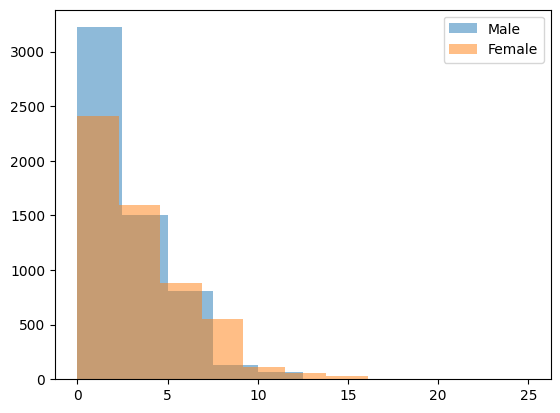

In [14]:

plt.hist(male_combined_double_faults['double_faults'],alpha=0.5)
plt.hist(female_combined_double_faults['double_faults'], alpha=0.5)
plt.legend(['Male', 'Female'])
plt.show()

In [15]:
t_statistic, p_value = stats.ttest_ind (male_combined_double_faults['double_faults'],
                                        female_combined_double_faults['double_faults'])
print(f"T-statistic: {t_statistic}, p-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print ('Samples shows significant difference (reject H0)')
    print ('so there is significant difference the number of double faults based on gender')
else:
    print ( 'Samples dose not show significant difference  (fail to reject H0)')
    print ('so there is not significant difference the number of double faults based on gender')

T-statistic: -18.598815378195127, p-value: 4.3727670450299826e-76
Samples shows significant difference (reject H0)
so there is significant difference the number of wins based on hostage
